# Project Portfolio Data Analysis Based on Amazon Store Dataset

<img src = 'Shirts.jpg' Style = 'width:75;height:150'>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Amazon Sale Report.csv', encoding = 'unicode_escape')

### Data Cleaning and Exploratory Data Analysis

In [4]:
df.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN


In [5]:
df.shape

(128976, 21)

In [6]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [7]:
df.describe(include = 'object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,121176,128941,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,1,8948,69,1,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,121176,11208,22272,128941,39263


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [10]:
df = df.rename(columns = {'currency': 'Currency', 'ship-service-level': 'Ship-service-level', 'ship-city': 'Ship-city', 'ship-state': 'Ship-state', 'ship-postal-code': 'Ship-postal-code', 'ship-country': 'Ship-country', 'fulfilled-by': 'Fulfilled-by'})

In [11]:
df.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,Ship-service-level,Category,Size,Courier Status,...,Currency,Amount,Ship-city,Ship-state,Ship-postal-code,Ship-country,B2B,Fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN


In [12]:
df.drop(['New', 'PendingS'], axis = 1, inplace = True)

In [13]:
df.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,Ship-service-level,Category,Size,Courier Status,Qty,Currency,Amount,Ship-city,Ship-state,Ship-postal-code,Ship-country,B2B,Fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship


In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
Ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
Currency              0
Amount                0
Ship-city             0
Ship-state            0
Ship-postal-code      0
Ship-country          0
B2B                   0
Fulfilled-by          0
dtype: int64

In [16]:
df['Ship-postal-code'] = df['Ship-postal-code'].astype('int')

In [17]:
df['Ship-postal-code'].dtype

dtype('int32')

In [18]:
#df['Date'] = pd.to_datetime (df['Date'])
df['Date'] = pd.to_datetime (df['Date'])

C:\Users\FOLARIN\AppData\Local\Temp\ipykernel_8700\760521879.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime (df['Date'])


In [19]:
df[['Qty', 'Amount']].describe()

,Qty,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


In [20]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'Ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Currency', 'Amount', 'Ship-city', 'Ship-state', 'Ship-postal-code',
       'Ship-country', 'B2B', 'Fulfilled-by'],
      dtype='object')

## Best Sold Cloth Sizes

In [21]:
Cloth_Sizes = pd.DataFrame(df.groupby('Size')['Qty'].sum().sort_values(ascending = False))
Cloth_Sizes

,Qty
Size,
M,5905
L,5795
XL,5481
XXL,4465
3XL,3972
S,3896
XS,2191
Free,467
6XL,170


<Figure size 400x400 with 0 Axes>

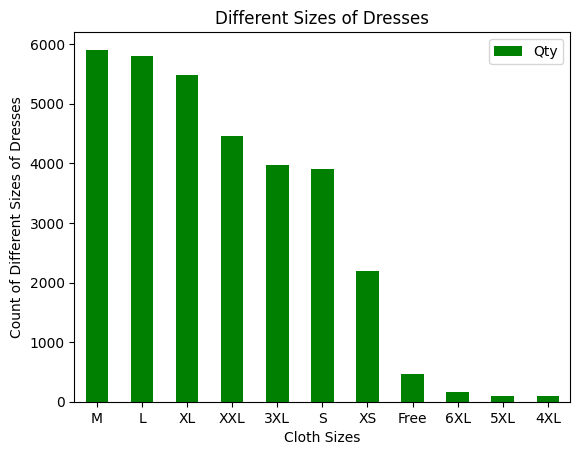

In [39]:
plt.figure(figsize = (4,4))
Cloth_Sizes.plot(kind = 'bar', color = ['green', 'blue', 'black', 'yellow', 'orange', 'gold', 'magenta', 'cyan'])
plt.title('Different Sizes of Dresses')
plt.ylabel('Count of Different Sizes of Dresses')
plt.xlabel('Cloth Sizes', fontsize = 10)
plt.xticks(rotation = 'horizontal')
plt.show()

#### It can be discovered from the above chart, that medium-sized dresses were best sold, followed by Large-Sized ones and then Extra-Large ones before other sizes.

In [23]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'Ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Currency', 'Amount', 'Ship-city', 'Ship-state', 'Ship-postal-code',
       'Ship-country', 'B2B', 'Fulfilled-by'],
      dtype='object')

## Best Sold Cloth Categories

In [24]:
Cloth_Categories = df.groupby('Category')['Qty'].sum().sort_values(ascending = False)
Cloth_Categories

Category
T-shirt     12147
Shirt       11715
Blazzer      5881
Trousers     2169
Perfume       255
Wallet        187
Socks         160
Shoes          25
Name: Qty, dtype: int64

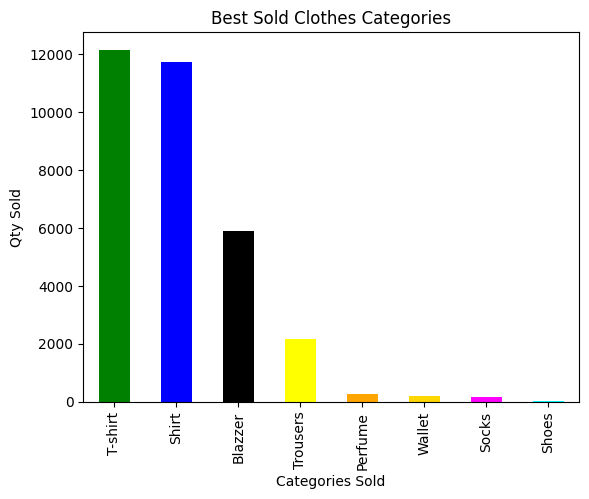

In [25]:
Cloth_Categories.plot(kind = 'bar', color = ['green', 'blue', 'black', 'yellow', 'orange', 'gold', 'magenta', 'cyan'])
plt.title('Best Sold Clothes Categories')
plt.ylabel('Qty Sold')
plt.xlabel('Categories Sold')
plt.show()

### T-Shirt was the most ordered for, followed by Shirt, and then Blazzer.

## Analysis by Courier Status

In [26]:
df.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,Ship-service-level,Category,Size,Courier Status,Qty,Currency,Amount,Ship-city,Ship-state,Ship-postal-code,Ship-country,B2B,Fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship


In [27]:
Status_Count = df.groupby('Status')['Qty'].sum().sort_values(ascending = False)
Status_Count

Status
Shipped - Delivered to Buyer     28865
Shipped - Returned to Seller      1968
Shipped - Picked Up                977
Pending - Waiting for Pick Up      283
Pending                            244
Shipped - Returning to Seller      150
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Cancelled                            0
Name: Qty, dtype: int64

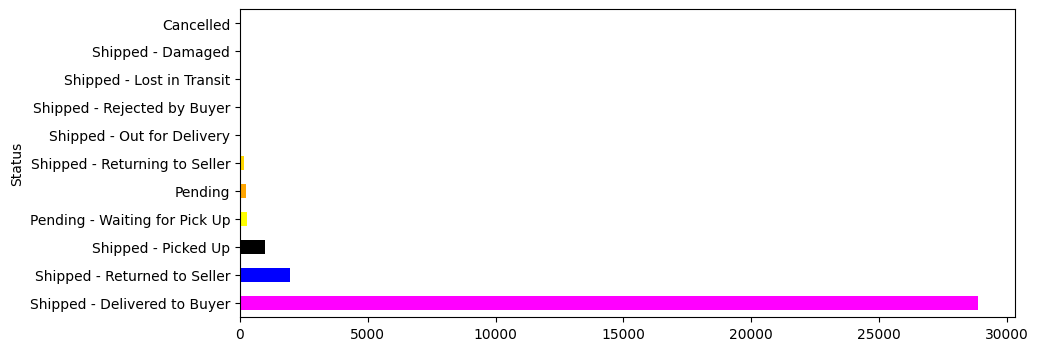

In [28]:
plt.figure(figsize = (10,4))
Status_Count.plot(kind = 'barh', color = ['magenta', 'blue', 'black', 'yellow', 'orange', 'gold', 'magenta', 'cyan'])
plt.show()

### As evident from the horizontal bar plot, goods delivered to the customer tops the courier status, followed by goods returned and shipped goods.

In [29]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'Ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Currency', 'Amount', 'Ship-city', 'Ship-state', 'Ship-postal-code',
       'Ship-country', 'B2B', 'Fulfilled-by'],
      dtype='object')

## Analysis of B2B Data

In [30]:
B2B = df['B2B'].value_counts()

In [31]:
B2B_Count = df.B2B.value_counts()
B2B_Count

B2B
False    37228
True       286
Name: count, dtype: int64

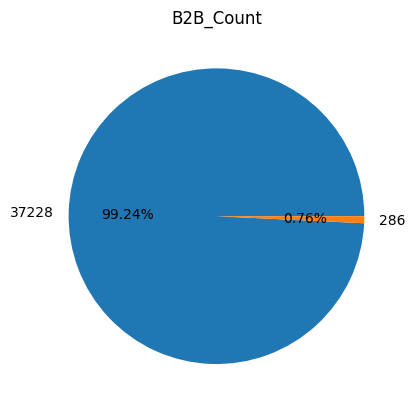

In [32]:
plt.pie(B2B_Count, labels = B2B_Count, autopct = '%1.2f%%')
plt.title('B2B_Count')
plt.show()

### B2B is true for most of the time.

## General Distribution According to States

In [33]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'Ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Currency', 'Amount', 'Ship-city', 'Ship-state', 'Ship-postal-code',
       'Ship-country', 'B2B', 'Fulfilled-by'],
      dtype='object')

In [34]:
State_Distribution = pd.DataFrame(df['Ship-state'].value_counts())
State_Distribution

,count
Ship-state,
MAHARASHTRA,6236
KARNATAKA,4550
UTTAR PRADESH,3298
TAMIL NADU,3167
TELANGANA,3136
KERALA,2213
DELHI,1955
WEST BENGAL,1653
ANDHRA PRADESH,1621


In [35]:
State_Distribution1 = df['Ship-state'].value_counts()
State_Distribution1

Ship-state
MAHARASHTRA               6236
KARNATAKA                 4550
UTTAR PRADESH             3298
TAMIL NADU                3167
TELANGANA                 3136
KERALA                    2213
DELHI                     1955
WEST BENGAL               1653
ANDHRA PRADESH            1621
Gujarat                   1382
HARYANA                   1226
RAJASTHAN                  870
MADHYA PRADESH             808
BIHAR                      656
ODISHA                     604
PUNJAB                     588
ASSAM                      540
UTTARAKHAND                500
JHARKHAND                  468
GOA                        316
CHHATTISGARH               310
HIMACHAL PRADESH           277
JAMMU & KASHMIR            232
CHANDIGARH                 112
PUDUCHERRY                 102
MANIPUR                    101
ANDAMAN & NICOBAR           91
NAGALAND                    69
MEGHALAYA                   68
SIKKIM                      59
ARUNACHAL PRADESH           53
TRIPURA                     

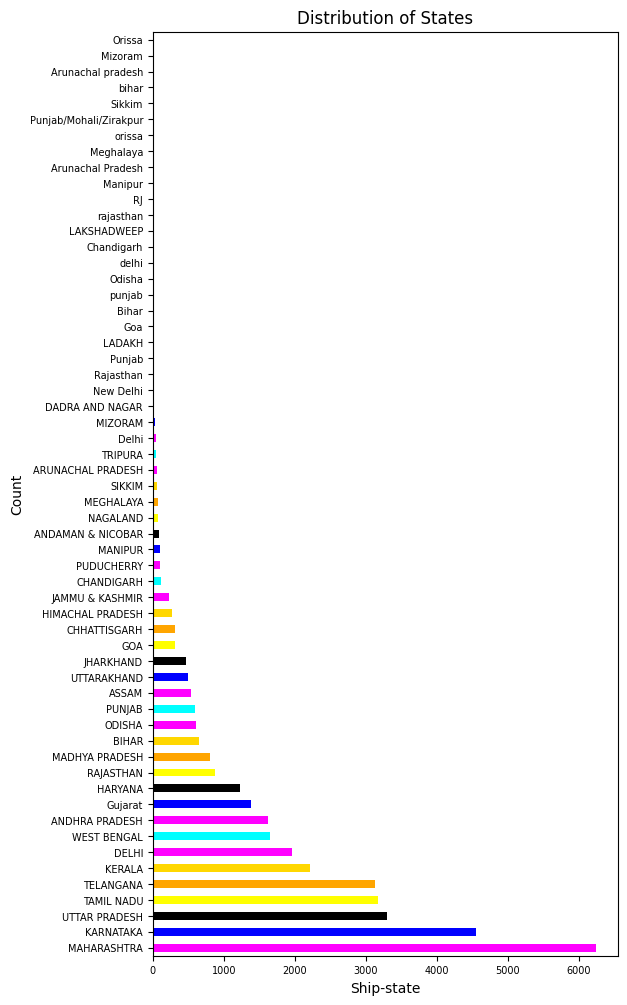

In [36]:
plt.figure(figsize = (6 ,12))
State_Distribution1.plot(kind = 'barh', fontsize = 7, color = ['magenta', 'blue', 'black', 'yellow', 'orange', 'gold', 'magenta', 'cyan'])
plt.xlabel('Ship-state')
plt.ylabel('Count')
plt.title('Distribution of States')
plt.show()

### Maharashtra has the highest patronage, followed by Karnataka and then Uttah Pradesh.

## SUMMARY
##### It can be discovered from the above chart, that medium-sized dresses were best sold, followed by Large-Sized ones and then Extra-Large ones before other sizes.
##### T-Shirt was the most ordered for, followed by Shirt, and then Blazzer.
##### As evident from the horizontal bar plot, goods delivered to the customer tops the courier status, followed by goods returned and shipped goods.
##### B2B is true for most of the time.
##### Maharashtra has the highest patronage, followed by Karnataka and then Uttah Pradesh.

## RECOMMENDATIONS
##### Medium-sized dresses should be produced enmass. 
##### More of T-Shirts, Shirts and Blazzer should be produced.
##### Advertisement should be target towards Maharashtra, Karnataka and Uttah Pradesh.